In [93]:
import pandas as pd
from pandas import read_csv, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков

dataset = read_csv('/content/drive/MyDrive/Data_Analysis/Killers.csv', sep=',',quotechar='"')
print(dataset.head(0))

Empty DataFrame
Columns: [Имя, Год рождения, Религия, Национальность, Пол, Работа, тюремное заключение, дефект речи, травма головы, Воровал, Был подвержен изнасилованию, родители наркоманы, злоупотребление наркотиками \ алкоголем, Проблемы в школе, Жил с детьми, физический дефект, посешал психолога, Были попытки самоубийства, посещал судебно-медицинскую клинику, Маньяк]
Index: []


In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
dataset.describe()

,Год рождения,Работа,тюремное заключение,дефект речи,травма головы,Воровал,Был подвержен изнасилованию,родители наркоманы,злоупотребление наркотиками \ алкоголем,Проблемы в школе,Жил с детьми,физический дефект,посешал психолога,Были попытки самоубийства,посещал судебно-медицинскую клинику,Маньяк
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,1908.718919,0.362162,0.459459,0.086486,0.210811,0.216216,0.372973,0.189189,0.540541,0.816216,0.172973,0.291892,0.254054,0.081081,0.135135,0.467568
std,78.578035,0.481930,0.499706,0.281844,0.408991,0.412781,0.484907,0.392722,0.499706,0.388359,0.379250,0.455867,0.436509,0.273700,0.342796,0.468029
min,1452.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1890.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1935.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,1956.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1992.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Имя                                      185 non-null    object 
 1   Год рождения                             185 non-null    int64  
 2   Религия                                  185 non-null    object 
 3   Национальность                           185 non-null    object 
 4   Пол                                      185 non-null    object 
 5   Работа                                   185 non-null    int64  
 6   тюремное заключение                      185 non-null    int64  
 7   дефект речи                              185 non-null    int64  
 8   травма головы                            185 non-null    int64  
 9   Воровал                                  185 non-null    int64  
 10  Был подвержен изнасилованию              185 non-n

In [97]:
dataset.isnull().sum()

,0
Имя,0
Год рождения,0
Религия,0
Национальность,0
Пол,0
Работа,0
тюремное заключение,0
дефект речи,0
травма головы,0
Воровал,0


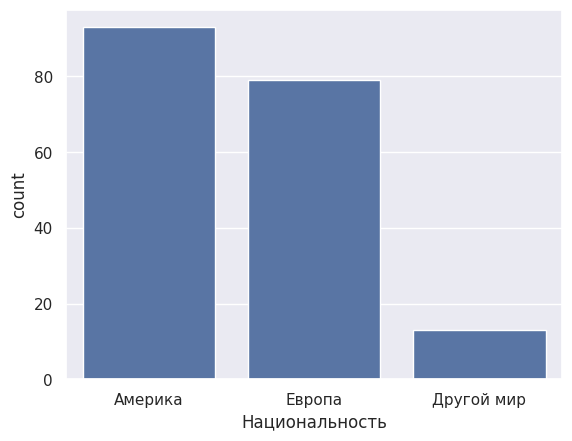

In [98]:
sns.countplot(x=dataset["Национальность"]);

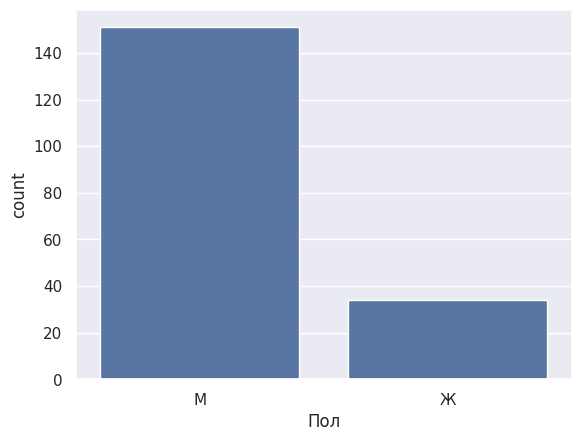

In [99]:
sns.countplot(x=dataset["Пол"]);

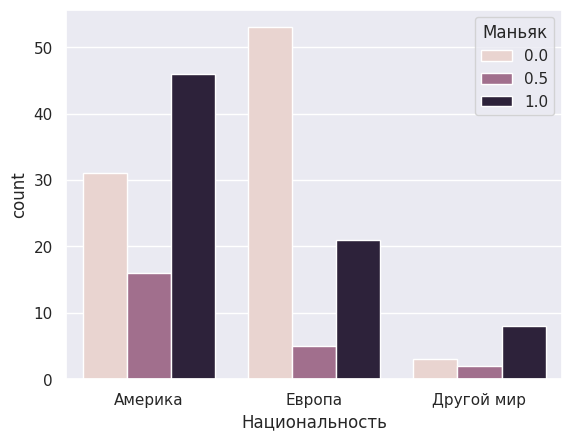

In [100]:
sns.countplot(data=dataset, x="Национальность", hue='Маньяк');

## Нормализация

In [101]:
from sklearn.preprocessing import MinMaxScaler  # StandardScaler

scaler_mm = MinMaxScaler()

dataset[['Годmm', 'Маньякmm']] = scaler_mm.fit_transform(dataset[['Год рождения', 'Маньяк']])
dataset.head()

,Имя,Год рождения,Религия,Национальность,Пол,Работа,тюремное заключение,дефект речи,травма головы,Воровал,...,злоупотребление наркотиками \ алкоголем,Проблемы в школе,Жил с детьми,физический дефект,посешал психолога,Были попытки самоубийства,посещал судебно-медицинскую клинику,Маньяк,Годmm,Маньякmm
0,John Joubert,1963,Атеист,Америка,М,0,1,0,0,0,...,1,1,0,0,0,0,0,1.0,0.946296,1.0
1,Harvey Glatman,1927,Атеист,Америка,М,1,0,0,0,0,...,0,1,0,0,1,0,0,1.0,0.879630,1.0
2,John Wayne Gacy,1942,Католицизм,Америка,М,1,1,0,1,0,...,0,1,0,1,1,0,0,1.0,0.907407,1.0
3,Ted Bundy,1946,Атеист,Америка,М,1,1,0,0,1,...,0,0,0,1,0,0,0,1.0,0.914815,1.0
4,Joseph Kallinger,1935,Атеист,Америка,М,0,1,0,1,1,...,0,0,1,1,1,0,1,1.0,0.894444,1.0


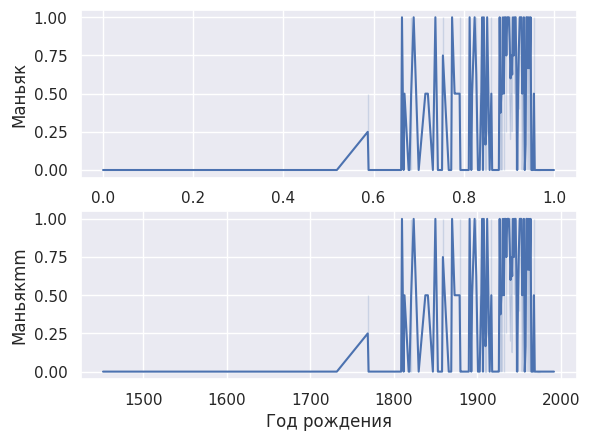

In [102]:
_, axs = plt.subplots(nrows=2)
sns.lineplot(data=dataset, x='Годmm', y='Маньяк', ax=axs[0])
sns.lineplot(data=dataset, x='Год рождения', y='Маньякmm', ax=axs[1]);

##Кодирование категориальных признаков

In [103]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

enc_ = OrdinalEncoder()

dataset[['Религия', 'Национальность', 'Пол']] = enc_.fit_transform(dataset[['Религия', 'Национальность', 'Пол']])



In [104]:
dataset.head()

,Имя,Год рождения,Религия,Национальность,Пол,Работа,тюремное заключение,дефект речи,травма головы,Воровал,...,злоупотребление наркотиками \ алкоголем,Проблемы в школе,Жил с детьми,физический дефект,посешал психолога,Были попытки самоубийства,посещал судебно-медицинскую клинику,Маньяк,Годmm,Маньякmm
0,John Joubert,1963,0.0,0.0,1.0,0,1,0,0,0,...,1,1,0,0,0,0,0,1.0,0.946296,1.0
1,Harvey Glatman,1927,0.0,0.0,1.0,1,0,0,0,0,...,0,1,0,0,1,0,0,1.0,0.879630,1.0
2,John Wayne Gacy,1942,3.0,0.0,1.0,1,1,0,1,0,...,0,1,0,1,1,0,0,1.0,0.907407,1.0
3,Ted Bundy,1946,0.0,0.0,1.0,1,1,0,0,1,...,0,0,0,1,0,0,0,1.0,0.914815,1.0
4,Joseph Kallinger,1935,0.0,0.0,1.0,0,1,0,1,1,...,0,0,1,1,1,0,1,1.0,0.894444,1.0


In [105]:
enc_.categories_

[array(['Атеист', 'Индуизм', 'Ислам', 'Католицизм', 'Сатанизм',
        'Христианство'], dtype=object),
 array(['Америка', 'Другой мир', 'Европа'], dtype=object),
 array(['Ж', 'М'], dtype=object)]

Корреляция - важнейший фактор, лежащий в основе анализа данных. Корреляция показывает, как переменные в наборе данных связаны друг с другом и как они изменяются относительно друг друга. Значение корреляции колеблется от -1 до +1. Нулевая корреляция означает, что две переменные не зависят друг от друга. Положительная корреляция указывает на то, что переменные движутся в одном направлении, а отрицательная корреляция указывает на противоположное.

##Тепловая карта

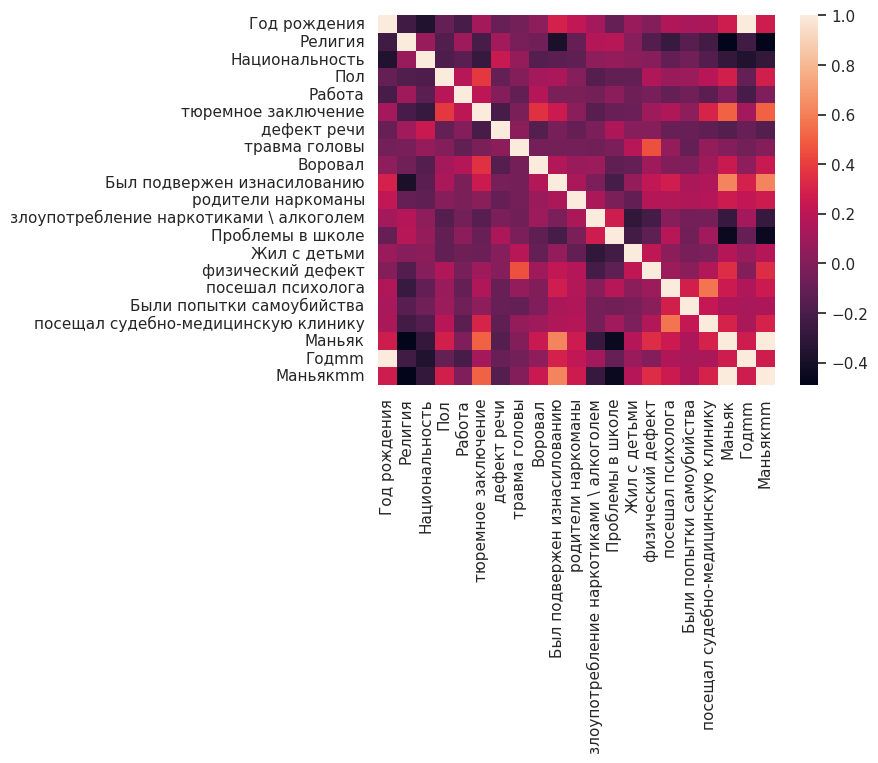

In [106]:
sns.heatmap(dataset.corr(numeric_only = True));